In [1]:
import pandas as pd
import sqlite3

In [2]:
file_path = '/Users/abderrahim_boussyf/Desktop/pertes technique.xlsx'

# Read the Excel file
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Display the first few rows of the dataframe
print(df.head())

             Unnamed: 0 Direction Provinciale  \
0                   NaN                   NaN   
1  4ème trimesttre 2016                   DPG   
2                   NaN                   DPL   
3                   NaN   Direction Régionale   
4  1ère trimesttre 2017                   DPG   

   Achat Energie avant transformateurs postes sources annuel (MWhrs)  \
0                                                NaN                   
1                                         126615.407                   
2                                         376224.616                   
3                                         502840.023                   
4                                         225901.328                   

  Perte technique HT-MT Unnamed: 4 Perte technique Réseau MT Unnamed: 6  \
0                 (MWh)     (en %)                     (MWh)     (en %)   
1               677.582     0.0054                  6145.329     0.0485   
2              1118.933      0.003             

l'analyse des pertes techniques à la DP Dakhla

In [3]:
# Define the file path
file_path = '/Users/abderrahim_boussyf/Desktop/pertes technique.xlsx'

# Read the Excel file, specifying the first two rows as headers
df = pd.read_excel(file_path, sheet_name='Sheet1', header=[0, 1])

# Flatten the multi-level column headers
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Drop any rows that are completely empty
df.dropna(axis=0, how='all', inplace=True)

# Display the cleaned DataFrame
print(df.head())


  Unnamed: 0_level_0 Unnamed: 0_level_1  \
0                  4ème trimesttre 2016   
1                                   NaN   
2                                   NaN   
3                  1ère trimesttre 2017   
4                                   NaN   

  Direction Provinciale Unnamed: 1_level_1  \
0                                      DPG   
1                                      DPL   
2                      Direction Régionale   
3                                      DPG   
4                                      DPL   

   Achat Energie avant transformateurs postes sources annuel (MWhrs) Unnamed: 2_level_1  \
0                                         126615.407                                      
1                                         376224.616                                      
2                                         502840.023                                      
3                                         225901.328                                      
4        

In [4]:
import pandas as pd

# Define the file path
file_path = '/Users/abderrahim_boussyf/Desktop/pertes technique.xlsx'

# Read the Excel file, specifying the first two rows as headers
df = pd.read_excel(file_path, sheet_name='Sheet1', header=[0, 1])

# Flatten the multi-level column headers
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Drop any rows that are completely empty
df.dropna(axis=0, how='all', inplace=True)

# Display the cleaned DataFrame
print(df.head())

# Optional: Rename columns for clarity
df.rename(columns={
    'Unnamed: 0_level_0 Unnamed: 0_level_1': 'Period',
    'Direction Provinciale Unnamed: 1_level_1': 'Direction Provinciale',
    'Achat Energie avant transformateurs postes sources annuel (MWhrs) Unnamed: 2_level_1': 'Achat Energie avant transformateurs (MWhrs)',
    'Perte technique HT-MT (MWh) Perte technique HT-MT (en %)': 'Perte technique HT-MT (MWh)',
    'Perte technique Réseau MT (MWh) Perte technique Réseau MT (en %)': 'Perte technique Réseau MT (MWh)',
    'Ventes MT annuelles  (MWh) Achats BT annuels (MWh)': 'Ventes MT annuelles (MWh)',
    'Perte technique  Réseau BT (MWh) Perte technique  Réseau BT (en %)': 'Perte technique Réseau BT (MWh)',
    'Perte technique   Branchement BT (MWh) Perte technique   Branchement BT (en %)': 'Perte technique Branchement BT (MWh)',
    'Perte technique Compteurs (MWh) Perte technique Compteurs (en %)': 'Perte technique Compteurs (MWh)',
    'Perte technique global (MWh) Taux de perte global  (en %)': 'Perte technique global (MWh)',
}, inplace=True)

# Display the renamed DataFrame
print(df.head())


  Unnamed: 0_level_0 Unnamed: 0_level_1  \
0                  4ème trimesttre 2016   
1                                   NaN   
2                                   NaN   
3                  1ère trimesttre 2017   
4                                   NaN   

  Direction Provinciale Unnamed: 1_level_1  \
0                                      DPG   
1                                      DPL   
2                      Direction Régionale   
3                                      DPG   
4                                      DPL   

   Achat Energie avant transformateurs postes sources annuel (MWhrs) Unnamed: 2_level_1  \
0                                         126615.407                                      
1                                         376224.616                                      
2                                         502840.023                                      
3                                         225901.328                                      
4        

In [5]:
print(df.head())
print(df.describe())
print(df.info())

                 Period Direction Provinciale  \
0  4ème trimesttre 2016                   DPG   
1                   NaN                   DPL   
2                   NaN   Direction Régionale   
3  1ère trimesttre 2017                   DPG   
4                   NaN                   DPL   

   Achat Energie avant transformateurs (MWhrs)  Perte technique HT-MT (MWh)  \
0                                   126615.407                      677.582   
1                                   376224.616                     1118.933   
2                                   502840.023                     1796.515   
3                                   225901.328                      863.686   
4                                   376560.874                     1228.755   

   Perte technique HT-MT (en %)  Perte technique Réseau MT (MWh)  \
0                      0.005400                         6145.329   
1                      0.003000                         9613.921   
2                      0.0

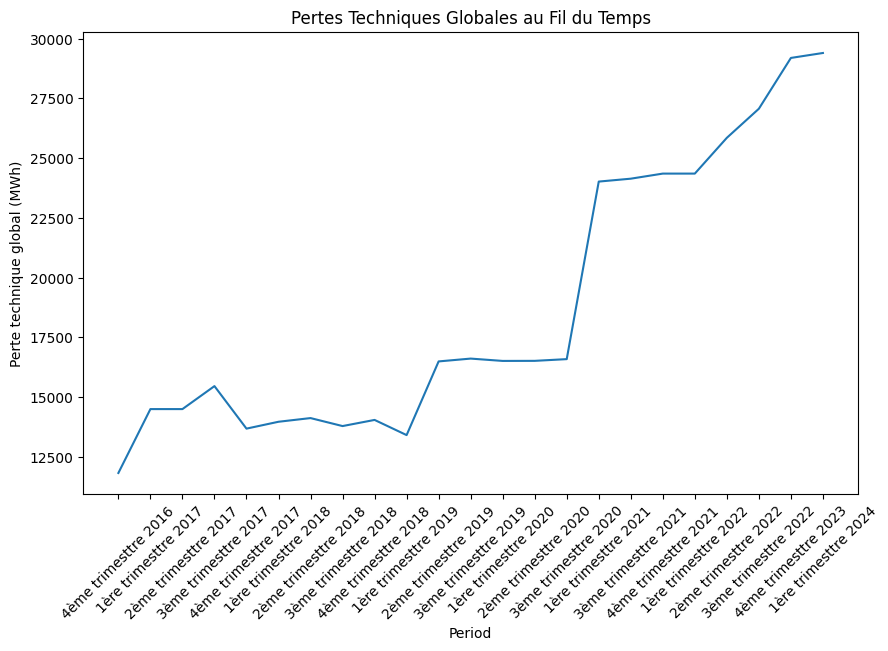

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Period', y='Perte technique global (MWh)')
plt.xticks(rotation=45)
plt.title('Pertes Techniques Globales au Fil du Temps')
plt.show()


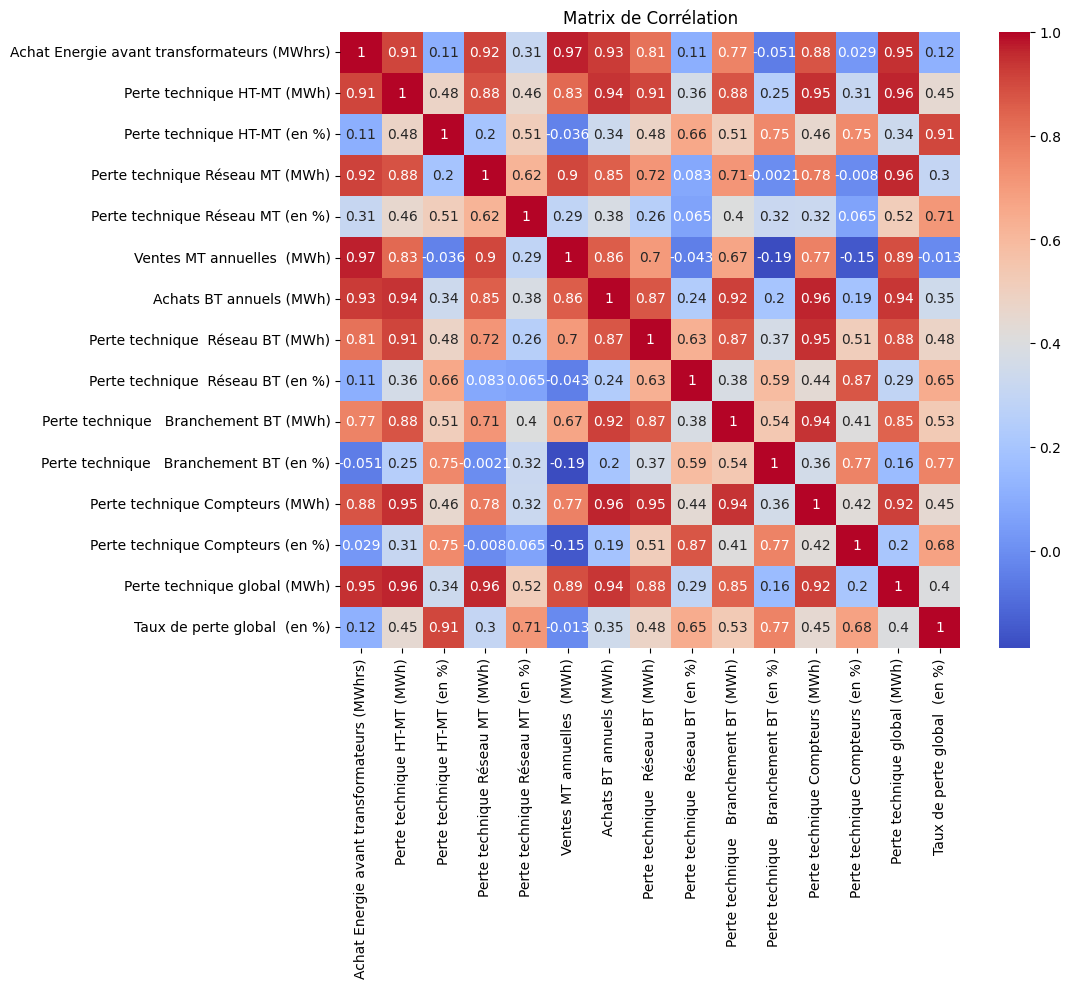

In [7]:
# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=[float, int])

# Calculer la matrice de corrélation
corr_matrix = numeric_df.corr()

# Afficher la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix de Corrélation')
plt.show()


In [8]:
# Afficher les noms des colonnes pour vérifier leur exactitude
print("Colonnes disponibles dans le DataFrame :")
print(df.columns)

# Corriger les noms des colonnes si nécessaire
X_columns = [
    'Achat Energie avant transformateurs (MWhrs)',
    'Perte technique HT-MT (MWh)',
    'Perte technique Réseau MT (MWh)',  # Vérifiez le nom exact
    'Ventes MT annuelles  (MWh)',
    'Achats BT annuels (MWh)',
    'Perte technique  Réseau BT (MWh)',  # Vérifiez le nom exact
    'Perte technique   Branchement BT (MWh)',  # Vérifiez le nom exact
    'Perte technique Compteurs (MWh)'  # Vérifiez le nom exact
]

# Nettoyer les noms des colonnes en supprimant les espaces supplémentaires
df.columns = df.columns.str.strip()

# Vérifiez à nouveau les noms des colonnes après nettoyage
print("Colonnes après nettoyage :")
print(df.columns)

# Sélectionner les colonnes de X et y
try:
    X = df[X_columns]
    y = df['Perte technique global (MWh)']
except KeyError as e:
    print(f"Erreur : {e}")
    print("Colonnes disponibles :")
    print(df.columns)

# Continuer avec la préparation des données, la division, et la modélisation si les colonnes sont trouvées


Colonnes disponibles dans le DataFrame :
Index(['Period', 'Direction Provinciale',
       'Achat Energie avant transformateurs (MWhrs)',
       'Perte technique HT-MT (MWh)', 'Perte technique HT-MT (en %)',
       'Perte technique Réseau MT (MWh)', 'Perte technique Réseau MT (en %)',
       'Ventes MT annuelles  (MWh)', 'Achats BT annuels (MWh)',
       'Perte technique  Réseau BT (MWh)', 'Perte technique  Réseau BT (en %)',
       'Perte technique   Branchement BT (MWh)',
       'Perte technique   Branchement BT (en %)',
       'Perte technique Compteurs (MWh)', 'Perte technique Compteurs (en %)',
       'Perte technique global (MWh)', 'Taux de perte global  (en %)'],
      dtype='object')
Colonnes après nettoyage :
Index(['Period', 'Direction Provinciale',
       'Achat Energie avant transformateurs (MWhrs)',
       'Perte technique HT-MT (MWh)', 'Perte technique HT-MT (en %)',
       'Perte technique Réseau MT (MWh)', 'Perte technique Réseau MT (en %)',
       'Ventes MT annuelles  

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données
df = pd.read_excel('/Users/abderrahim_boussyf/Desktop/pertes technique.xlsx')

# Nettoyer les noms des colonnes
df.columns = df.columns.str.strip()

# Afficher les noms des colonnes
print("Colonnes dans le DataFrame:", df.columns.tolist())

# Liste des colonnes X mises à jour pour correspondre aux noms dans le DataFrame
X_columns = [
    'Achat Energie avant transformateurs postes sources annuel (MWhrs)',
    'Perte technique HT-MT',
    'Perte technique\xa0Réseau MT',
    'Ventes MT annuelles',
    'Achats BT annuels',
    'Perte technique\xa0 Réseau BT',
    'Perte technique\xa0\xa0 Branchement BT',
    'Perte technique\xa0Compteurs'
]

# Vérifier si toutes les colonnes sont présentes
missing_cols = [col for col in X_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Les colonnes suivantes sont manquantes : {missing_cols}")

# Convertir les colonnes en numériques, forcer les erreurs à NaN
for col in X_columns + ['Perte technique global']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérifier les colonnes pour les valeurs non numériques
for col in X_columns + ['Perte technique global']:
    non_numeric = df[col].isna().sum()
    if non_numeric > 0:
        print(f"La colonne {col} contient {non_numeric} valeurs non numériques qui seront ignorées.")

# Supprimer les lignes contenant des valeurs NaN
df = df.dropna(subset=X_columns + ['Perte technique global'])

# Sélectionner les colonnes de X et y
X = df[X_columns]
y = df['Perte technique global']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Afficher les coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Colonnes dans le DataFrame: ['Unnamed: 0', 'Direction Provinciale', 'Achat Energie avant transformateurs postes sources annuel (MWhrs)', 'Perte technique HT-MT', 'Unnamed: 4', 'Perte technique\xa0Réseau MT', 'Unnamed: 6', 'Ventes MT annuelles', 'Achats BT annuels', 'Perte technique\xa0 Réseau BT', 'Unnamed: 10', 'Perte technique\xa0\xa0 Branchement BT', 'Unnamed: 12', 'Perte technique\xa0Compteurs', 'Unnamed: 14', 'Perte technique global', 'Taux de perte global']
La colonne Achat Energie avant transformateurs postes sources annuel (MWhrs) contient 1 valeurs non numériques qui seront ignorées.
La colonne Perte technique HT-MT contient 1 valeurs non numériques qui seront ignorées.
La colonne Perte technique Réseau MT contient 1 valeurs non numériques qui seront ignorées.
La colonne Ventes MT annuelles contient 1 valeurs non numériques qui seront ignorées.
La colonne Achats BT annuels contient 1 valeurs non numériques qui seront ignorées.
La colonne Perte technique  Réseau BT contient 1 v

Colonnes dans le DataFrame: ['Unnamed: 0', 'Direction Provinciale', 'Achat Energie avant transformateurs postes sources annuel (MWhrs)', 'Perte technique HT-MT', 'Unnamed: 4', 'Perte technique\xa0Réseau MT', 'Unnamed: 6', 'Ventes MT annuelles', 'Achats BT annuels', 'Perte technique\xa0 Réseau BT', 'Unnamed: 10', 'Perte technique\xa0\xa0 Branchement BT', 'Unnamed: 12', 'Perte technique\xa0Compteurs', 'Unnamed: 14', 'Perte technique global', 'Taux de perte global']
La colonne Achat Energie avant transformateurs postes sources annuel (MWhrs) contient 1 valeurs non numériques qui seront ignorées.
La colonne Perte technique HT-MT contient 1 valeurs non numériques qui seront ignorées.
La colonne Perte technique Réseau MT contient 1 valeurs non numériques qui seront ignorées.
La colonne Ventes MT annuelles contient 1 valeurs non numériques qui seront ignorées.
La colonne Achats BT annuels contient 1 valeurs non numériques qui seront ignorées.
La colonne Perte technique  Réseau BT contient 1 v

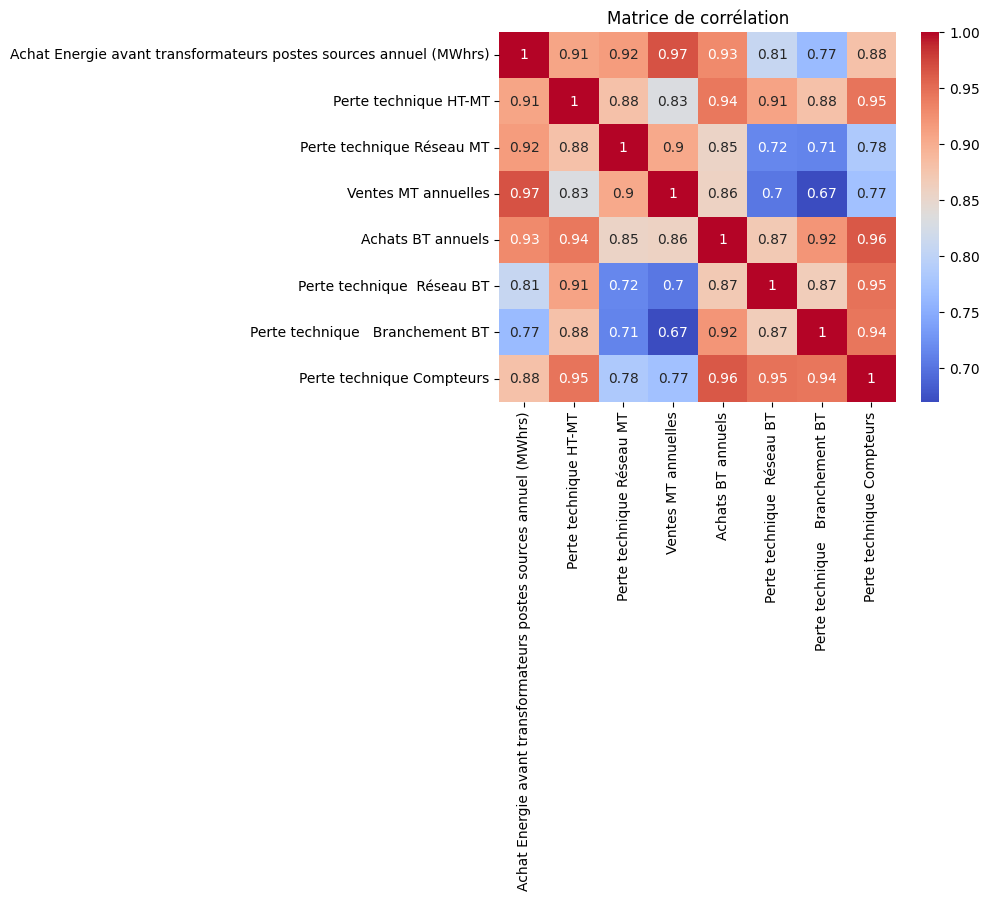

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_excel('/Users/abderrahim_boussyf/Desktop/pertes technique.xlsx')

# Nettoyer les noms des colonnes
df.columns = df.columns.str.strip()

# Afficher les noms des colonnes
print("Colonnes dans le DataFrame:", df.columns.tolist())

# Liste des colonnes X mises à jour pour correspondre aux noms dans le DataFrame
X_columns = [
    'Achat Energie avant transformateurs postes sources annuel (MWhrs)',
    'Perte technique HT-MT',
    'Perte technique\xa0Réseau MT',
    'Ventes MT annuelles',
    'Achats BT annuels',
    'Perte technique\xa0 Réseau BT',
    'Perte technique\xa0\xa0 Branchement BT',
    'Perte technique\xa0Compteurs'
]

# Vérifier si toutes les colonnes sont présentes
missing_cols = [col for col in X_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Les colonnes suivantes sont manquantes : {missing_cols}")

# Convertir les colonnes en numériques, forcer les erreurs à NaN
for col in X_columns + ['Perte technique global']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérifier les colonnes pour les valeurs non numériques
for col in X_columns + ['Perte technique global']:
    non_numeric = df[col].isna().sum()
    if non_numeric > 0:
        print(f"La colonne {col} contient {non_numeric} valeurs non numériques qui seront ignorées.")

# Supprimer les lignes contenant des valeurs NaN
df = df.dropna(subset=X_columns + ['Perte technique global'])

# Sélectionner les colonnes de X et y
X = df[X_columns]
y = df['Perte technique global']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Afficher les coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Inspecter les données après le nettoyage
print("Données nettoyées :")
print(df.head())

# Vérifier la multicolinéarité
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


In [14]:
# Mise à jour des noms des colonnes pour correspondre aux noms exacts
X_columns = [
    'Achat Energie avant transformateurs postes sources annuel (MWhrs)',  # Nom corrigé
    'Perte technique HT-MT',  # Nom corrigé
    'Perte technique Réseau MT',  # Nom corrigé
    'Ventes MT annuelles',  # Nom corrigé
    'Achats BT annuels',  # Nom corrigé
    'Perte technique  Réseau BT',  # Nom corrigé
    'Perte technique   Branchement BT',  # Nom corrigé
    'Perte technique Compteurs'  # Nom corrigé
]

# Vérifier les colonnes après nettoyage
df.columns = df.columns.str.strip()

# Vérifier les colonnes disponibles dans le DataFrame
print("Colonnes disponibles dans le DataFrame :")
print(df.columns.tolist())

# Vérifier les colonnes manquantes
missing_cols = [col for col in X_columns if col not in df.columns]
if missing_cols:
    print(f"Les colonnes suivantes sont manquantes : {missing_cols}")
else:
    # Sélectionner les colonnes de X et y
    X = df[X_columns]
    y = df['Perte technique global']

    # Diviser les données en ensemble d'entraînement et ensemble de test
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Créer et entraîner le modèle
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prédire les valeurs pour l'ensemble de test
    y_pred = model.predict(X_test)

    # Évaluer le modèle
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    # Afficher les coefficients
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)


Colonnes disponibles dans le DataFrame :
['Unnamed: 0', 'Direction Provinciale', 'Achat Energie avant transformateurs postes sources annuel (MWhrs)', 'Perte technique HT-MT', 'Unnamed: 4', 'Perte technique\xa0Réseau MT', 'Unnamed: 6', 'Ventes MT annuelles', 'Achats BT annuels', 'Perte technique\xa0 Réseau BT', 'Unnamed: 10', 'Perte technique\xa0\xa0 Branchement BT', 'Unnamed: 12', 'Perte technique\xa0Compteurs', 'Unnamed: 14', 'Perte technique global', 'Taux de perte global']
Les colonnes suivantes sont manquantes : ['Perte technique Réseau MT', 'Perte technique  Réseau BT', 'Perte technique   Branchement BT', 'Perte technique Compteurs']


In [15]:
import pandas as pd
import numpy as np

# Liste des colonnes à nettoyer
numeric_columns = [
    'Perte technique HT-MT',
    'Perte technique Réseau MT',
    'Ventes MT annuelles',
    'Achats BT annuels',
    'Perte technique  Réseau BT',
    'Perte technique  Branchement BT',
    'Perte technique Compteurs',
    'Perte technique global',
    'Taux de perte global'
]

# Fonction pour nettoyer les colonnes
def clean_numeric_column(df, column_name):
    # Strip any leading/trailing spaces from column names
    df.columns = df.columns.str.strip()
    
    if column_name in df.columns:
        # Convert non-numeric values to NaN
        df[column_name] = pd.to_numeric(df[column_name].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
        # Replace NaN with 0
        df[column_name] = df[column_name].fillna(0)
    else:
        print(f"Column '{column_name}' does not exist in the DataFrame.")

# Vérifiez les types de données après nettoyage
print(df.dtypes)

# Vérifiez les premières lignes après nettoyage
print(df.head())


Unnamed: 0                                                            object
Direction Provinciale                                                 object
Achat Energie avant transformateurs postes sources annuel (MWhrs)    float64
Perte technique HT-MT                                                float64
Unnamed: 4                                                            object
Perte technique Réseau MT                                            float64
Unnamed: 6                                                            object
Ventes MT annuelles                                                  float64
Achats BT annuels                                                    float64
Perte technique  Réseau BT                                           float64
Unnamed: 10                                                           object
Perte technique   Branchement BT                                     float64
Unnamed: 12                                                           object

In [16]:
df.rename(columns={
    'Perte technique  Réseau BT': 'Perte technique Réseau BT',
    'Perte technique   Branchement BT': 'Perte technique Branchement BT'
}, inplace=True)


X_columns = [
    'Achat Energie avant transformateurs postes sources annuel (MWhrs)',
    'Perte technique HT-MT',
    'Perte technique Réseau MT',
    'Ventes MT annuelles',
    'Achats BT annuels',
    'Perte technique Réseau BT',
    'Perte technique Branchement BT',
    'Perte technique Compteurs'
]


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Charger les données
df = pd.read_excel('/Users/abderrahim_boussyf/Desktop/pertes technique.xlsx')

# Assurez-vous que les colonnes sont nettoyées des espaces superflus
df.columns = df.columns.str.strip()

# Remplacer les espaces insécables et les caractères non standard dans les noms de colonnes
df.columns = df.columns.str.replace('\xa0', ' ', regex=False)

# Liste des colonnes à nettoyer
numeric_columns = [
    'Achat Energie avant transformateurs postes sources annuel (MWhrs)',
    'Perte technique HT-MT',
    'Perte technique Réseau MT',
    'Ventes MT annuelles',
    'Achats BT annuels',
    'Perte technique Réseau BT',
    'Perte technique Branchement BT',
    'Perte technique Compteurs'
]

# Fonction pour nettoyer les colonnes
def clean_numeric_column(df, column_name):
    try:
        # Convertir les valeurs non numériques en NaN
        df[column_name] = pd.to_numeric(df[column_name].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')
        # Remplacer les NaN par 0 ou une autre valeur par défaut
        df[column_name] = df[column_name].fillna(0)
    except KeyError as e:
        print(f"KeyError: {e} - Column '{column_name}' might be missing or misnamed.")

# Nettoyer les colonnes
for col in numeric_columns:
    clean_numeric_column(df, col)

# Vérifiez les types de données après nettoyage
print("DataFrame dtypes after cleaning:")
print(df.dtypes)

# Liste des colonnes pour X et y après nettoyage
X_columns = [
    'Achat Energie avant transformateurs postes sources annuel (MWhrs)',
    'Perte technique HT-MT',
    'Perte technique Réseau MT',
    'Ventes MT annuelles',
    'Achats BT annuels',
    'Perte technique Réseau BT',
    'Perte technique Branchement BT',
    'Perte technique Compteurs'
]

# Vérifier la présence de la colonne cible
if 'Perte technique global' not in df.columns:
    raise KeyError("Column 'Perte technique global' does not exist in the DataFrame.")

# Sélectionner les colonnes de X et y
X = df[X_columns]
y = df['Perte technique global']

# Vérifier les données avant la division
print("DataFrame head before splitting:")
print(df.head())
print("DataFrame shape:")
print(df.shape)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Vérifier les données après l'imputation
print("X_train after imputation:")
print(X_train[:5])
print("X_test after imputation:")
print(X_test[:5])
print("y_train:")
print(y_train.head())

# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Afficher les coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


KeyError: 'Perte technique Réseau BT' - Column 'Perte technique Réseau BT' might be missing or misnamed.
KeyError: 'Perte technique Branchement BT' - Column 'Perte technique Branchement BT' might be missing or misnamed.
DataFrame dtypes after cleaning:
Unnamed: 0                                                            object
Direction Provinciale                                                 object
Achat Energie avant transformateurs postes sources annuel (MWhrs)    float64
Perte technique HT-MT                                                float64
Unnamed: 4                                                            object
Perte technique Réseau MT                                            float64
Unnamed: 6                                                            object
Ventes MT annuelles                                                  float64
Achats BT annuels                                                    float64
Perte technique  Réseau BT                            

KeyError: "['Perte technique Réseau BT', 'Perte technique Branchement BT'] not in index"

In [19]:
print(f"Ensemble d'entraînement : {X_train.shape[0]} échantillons")
print(f"Ensemble de test : {X_test.shape[0]} échantillons")


Ensemble d'entraînement : 71 échantillons
Ensemble de test : 18 échantillons


In [22]:
from sklearn.model_selection import cross_val_score

# Validation croisée
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Scores de validation croisée : {scores}")
print(f"Score moyen de validation croisée : {scores.mean()}")


Scores de validation croisée : [1. 1. 1. 1. 1.]
Score moyen de validation croisée : 1.0


In [23]:
for i, col in enumerate(X_columns):
    print(f"{col}: {model.coef_[i]}")


Achat Energie avant transformateurs postes sources annuel (MWhrs): 5.727050899624722e-16
Perte technique HT-MT: 0.9999999999999808
Perte technique Réseau MT: 1.0000000000000013
Ventes MT annuelles: -5.332041542234261e-16
Achats BT annuels: -9.216946152555385e-17
Perte technique Réseau BT: 0.9999999999999979
Perte technique Branchement BT: 0.9999999999999561
Perte technique Compteurs: 0.9999999999999996


In [24]:
# Vérifiez les valeurs manquantes
print(df.isnull().sum())

# Vérifiez les valeurs aberrantes potentielles
print(df.describe())


Unnamed: 0                                                           67
Direction Provinciale                                                 1
Achat Energie avant transformateurs postes sources annuel (MWhrs)     0
Perte technique HT-MT                                                 0
Unnamed: 4                                                            0
Perte technique Réseau MT                                             0
Unnamed: 6                                                            0
Ventes MT annuelles                                                   0
Achats BT annuels                                                     0
Perte technique  Réseau BT                                            0
Unnamed: 10                                                           0
Perte technique   Branchement BT                                      0
Unnamed: 12                                                           0
Perte technique Compteurs                                       

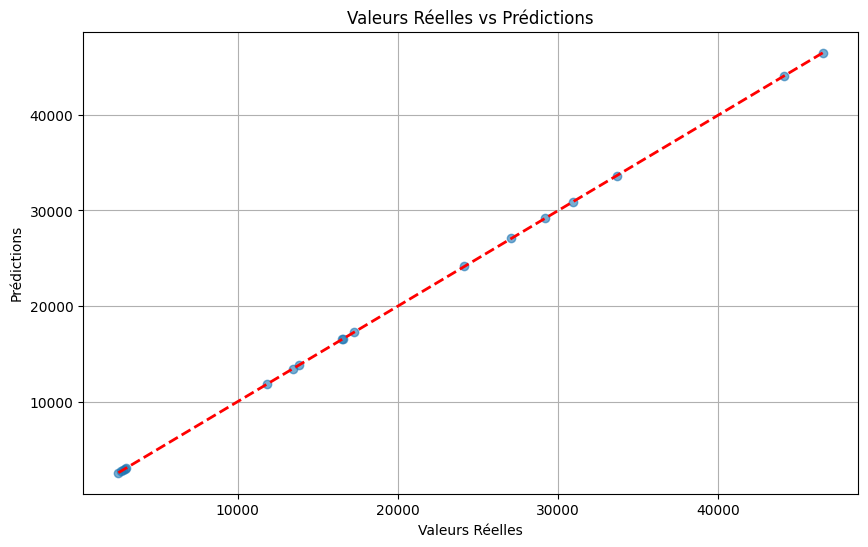

In [25]:
import matplotlib.pyplot as plt

# Prédictions
y_pred = model.predict(X_test)

# Tracer les valeurs réelles vs prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs Prédictions')
plt.grid(True)
plt.show()


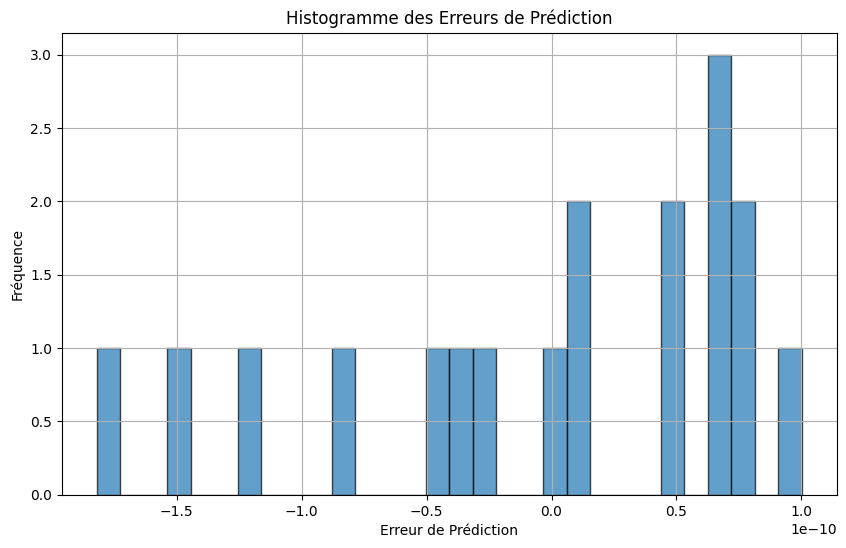

In [26]:
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Erreur de Prédiction')
plt.ylabel('Fréquence')
plt.title('Histogramme des Erreurs de Prédiction')
plt.grid(True)
plt.show()


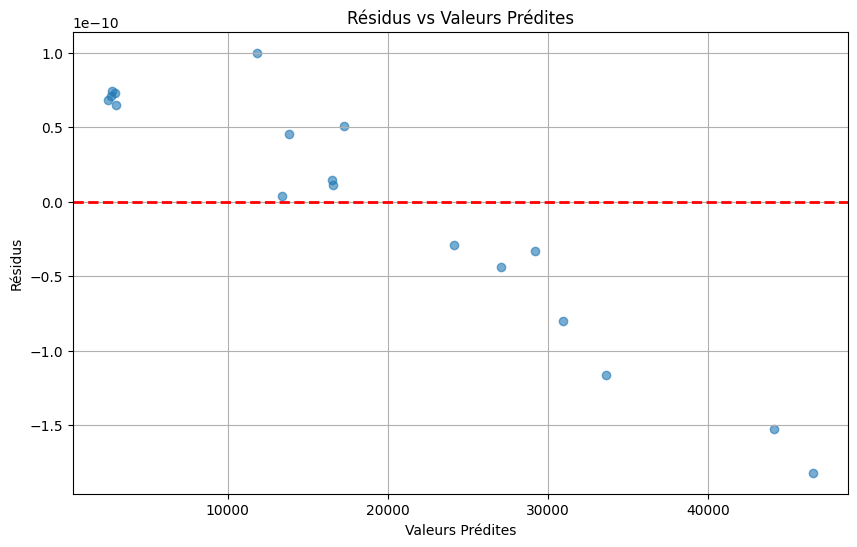

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, errors, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.title('Résidus vs Valeurs Prédites')
plt.grid(True)
plt.show()


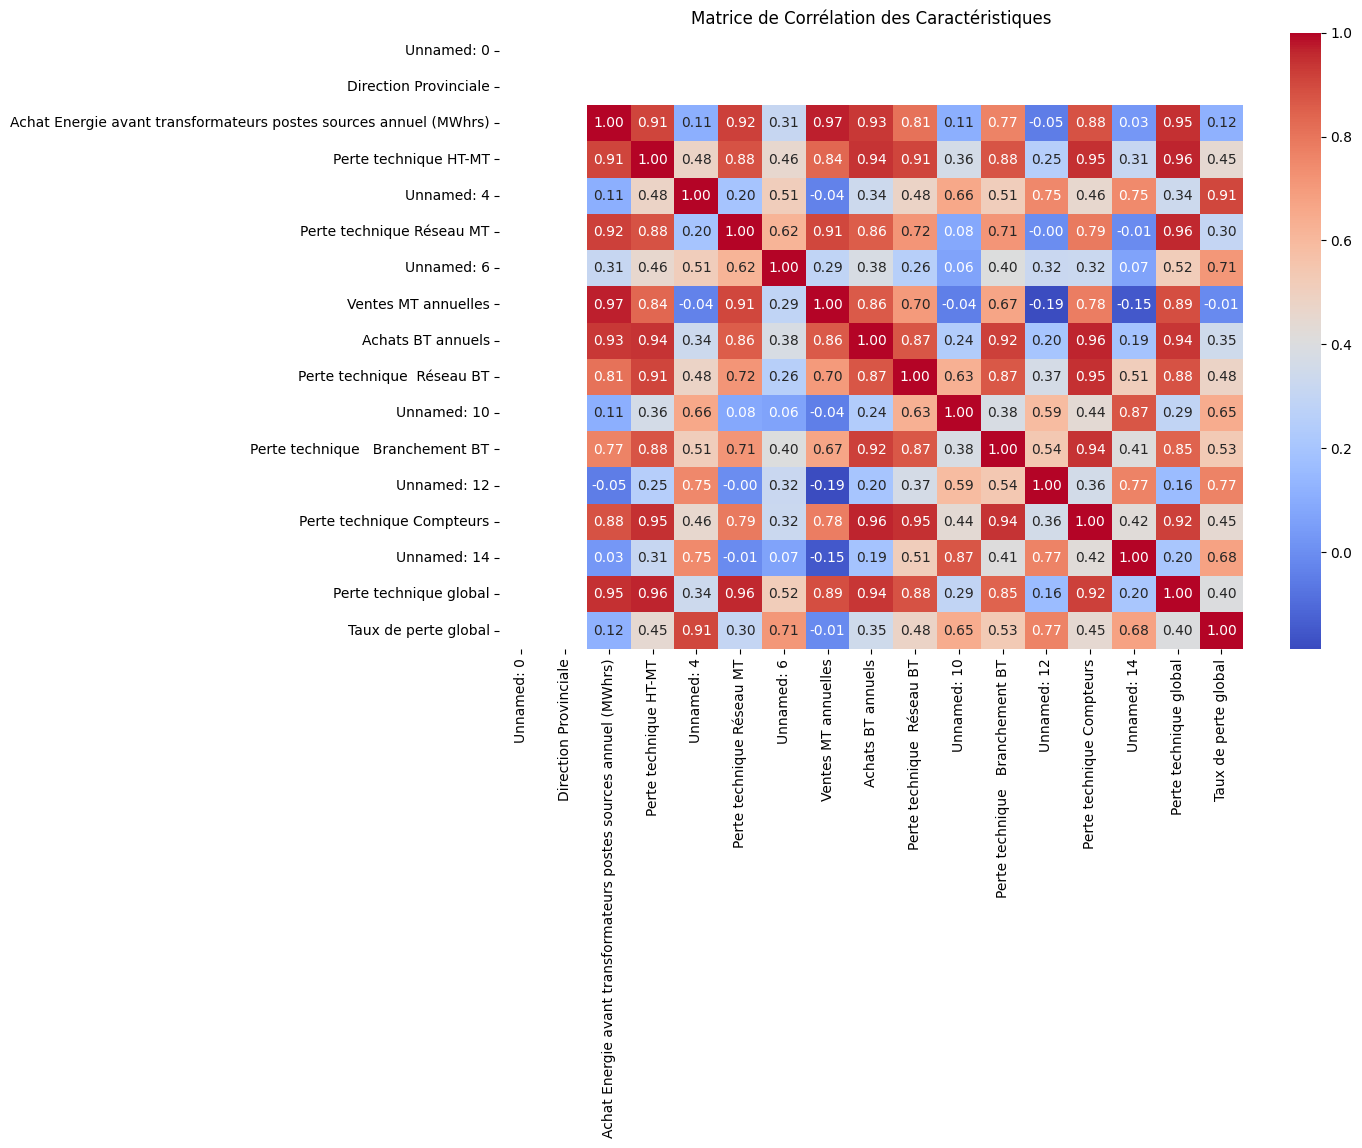

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Exemple de DataFrame avec des colonnes non numériques
# Assurez-vous de remplacer df par votre DataFrame
df = df.copy()  # Crée une copie pour éviter les modifications inopinées

# Convertir les colonnes non numériques en NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation des Caractéristiques')
plt.show()


In [30]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(X_columns):
    plt.subplot(len(X_columns) // 3 + 1, 3, i + 1)
    plt.hist(X_test[:, i], bins=30, edgecolor='k', alpha=0.7)
    plt.title(col)

plt.tight_layout()
plt.show()


KeyError: 'Perte technique Réseau BT' - Column 'Perte technique Réseau BT' might be missing or misnamed.
KeyError: 'Perte technique Branchement BT' - Column 'Perte technique Branchement BT' might be missing or misnamed.
DataFrame dtypes after cleaning:
Unnamed: 0                                                            object
Direction Provinciale                                                 object
Achat Energie avant transformateurs postes sources annuel (MWhrs)    float64
Perte technique HT-MT                                                float64
Unnamed: 4                                                            object
Perte technique Réseau MT                                            float64
Unnamed: 6                                                            object
Ventes MT annuelles                                                  float64
Achats BT annuels                                                    float64
Perte technique  Réseau BT                            

KeyError: "['Perte technique Réseau BT', 'Perte technique Branchement BT'] not in index"